In [1]:
from train import train_model
import load_data_jax_metrics
import training_jax_lossvariance as train
import importlib 
import numpy as np



In [2]:
#dataset_list=['frequencies_low','frequencies_high','frequencies_noisy','frequencies_small','suma','mackey','legendre3','btc','sp500'] 
#first with only one dataset
dataset_list=['frequencies_low']
sample_size_list=[5,5,5,5,5,4,5,5,5] #the sample size for each dataset, for euro and legendre this is 5.  For mackey is 4

#qubits_list=[16,20,24,32] #in the paper we utilize 2,4,6 or 8 
qubits_list=[2]
hidden_list=[16]#[16,32,48,64]
key_list=[0,1,2,3,4,5,6,7,8,9] #the key for the random number generator
kernel_size=2
architecture='super_parallel' #options are no_reupload, parallel and super_parallel
#point_list=[268,518,768,1018,1268,1518,1768,2018,2268,3518,2768,3018,3268,3518,3768,4018]
point_list=[1000]
 # if you want to work with parallel ansatz indicate the number of layers in the loop below in variable n_layers
model="QLSTM" #options are LSTM, QLSTM
convergence=False

For generating plots of time varying number of points
=======================================================

In [3]:
times=np.zeros((int(len(point_list)),int(len(key_list))))
for p in range(len(point_list)):  
    points=point_list[p] 
    for k in range(len(key_list)):
        key=key_list[k]
        for d in range(len(dataset_list)):
            dataset=dataset_list[d]
            seq_len=sample_size_list[d]
            
            X_train,Y_train,X_test,Y_test,trainloader,testloader,data,features=load_data_jax_metrics.data(dataset,points)
            print(features)
            target_size=1
            for q in range(len(qubits_list)):
                n_qubits=qubits_list[q]
                if architecture=='super_parallel':
                    n_layers=n_qubits//kernel_size
                elif architecture=='parallel' or architecture=='no_reupload':
                    n_layers=4
                for h in range(len(hidden_list)):
                    concat_size=hidden_list[h]
                    #run_Name=dataset+ansatz+str(out_channels)+str(n_layers)+str(architecture)+str(key)
                    run_name=dataset+str(concat_size)+str(n_qubits)+str(key)+str('small8Q25')
                    train.train_model(X_train,Y_train,X_test,Y_test,trainloader,testloader,data,run_name,dataset, seq_len,n_layers,n_qubits,concat_size,target_size,key,model,convergence)
                        

#np.savetxt('times_varyingpoints.csv',times)

low
1
el shape es (16, 5, 1)

Starting epoch 1
Epoch 1: Train Loss = 0.091020, Validation Loss = 0.080181

Starting epoch 2
Epoch 2: Train Loss = 0.080365, Validation Loss = 0.077486

Starting epoch 3
Epoch 3: Train Loss = 0.077935, Validation Loss = 0.075741

Starting epoch 4
Epoch 4: Train Loss = 0.075984, Validation Loss = 0.073674

Starting epoch 5
Epoch 5: Train Loss = 0.073621, Validation Loss = 0.070980

Starting epoch 6
Epoch 6: Train Loss = 0.070469, Validation Loss = 0.067322

Starting epoch 7
Epoch 7: Train Loss = 0.066152, Validation Loss = 0.062285

Starting epoch 8
Epoch 8: Train Loss = 0.060234, Validation Loss = 0.055421

Starting epoch 9
Epoch 9: Train Loss = 0.052278, Validation Loss = 0.046357

Starting epoch 10
Epoch 10: Train Loss = 0.042057, Validation Loss = 0.035209

Starting epoch 11
Epoch 11: Train Loss = 0.030311, Validation Loss = 0.023562

Starting epoch 12
Epoch 12: Train Loss = 0.019589, Validation Loss = 0.014632

Starting epoch 13
Epoch 13: Train Loss =

KeyboardInterrupt: 

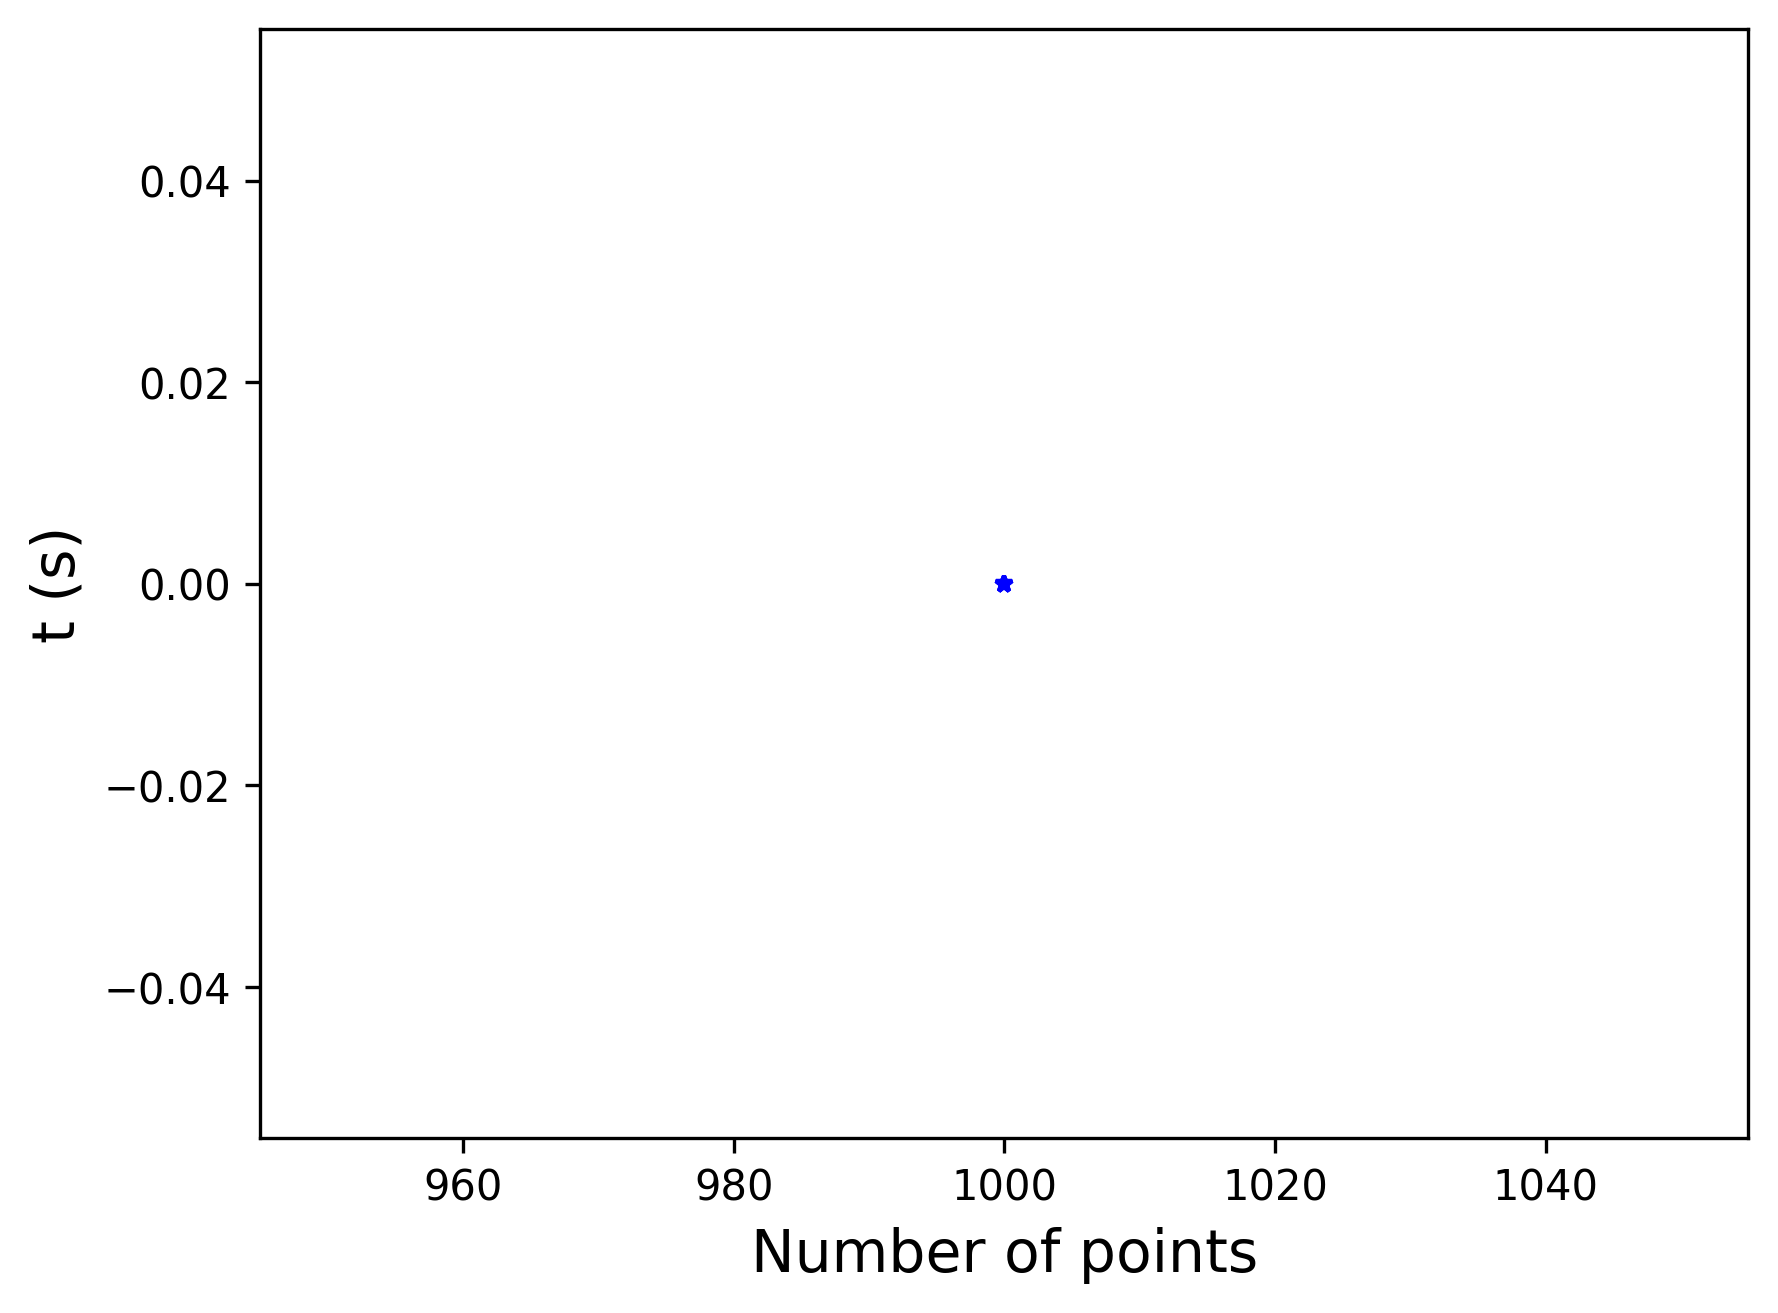

In [ ]:
import matplotlib.pyplot as plt
# Asegurarse de que point_list sea un array de NumPy (si no lo es ya)
point_list = np.array(point_list)

# Configuración de la figura con un DPI de 300
plt.figure(dpi=300)

# Graficar los puntos en el mismo color (ej: azul)
for k in range(len(key_list)):
    plt.plot(point_list, times[:,k], '*', color='blue',markersize=4)

# Etiquetas de los ejes
plt.xlabel('Number of points',fontsize=14)
plt.ylabel('t (s)',fontsize=14)

# Mostrar la gráfica
plt.show()

For generating the plot of the qubits dependence
==================================================

In [ ]:
dataset_list=['mackey']
sample_size_list=[4] #the sample size for each dataset, for euro and legendre this is 5.  For mackey is 4
qubits_list=[14,12,10,8,6,4,2] #in the paper we utilize 2,4,6 or 8 
ansatz_list=['basic_layers']
key_list=[1,2,3,4,5,6,7,8,9,0]
kernel_size=2
architecture='super_parallel' #options are no_reupload, parallel and super_parallel
point_list=[268]

In [ ]:
times=np.zeros((int(len(point_list)),int(len(key_list))))
for p in range(len(point_list)):  
    points=point_list[p] 
    for k in range(len(key_list)):
        key=key_list[k]
        for d in range(len(dataset_list)):
            dataset=dataset_list[d]
            l=sample_size_list[d]
            out_size = (l + 2*(1) - kernel_size) // 1 + 1 #since paddding and stride are 1
        
            X_train,Y_train,trainloader,data=load_data_jax.data(dataset,points)
            for q in range(len(qubits_list)):
                out_channels=qubits_list[q]
                if architecture=='super_parallel':
                    n_layers=out_channels//kernel_size
                elif architecture=='parallel' or architecture=='no_reupload':
                    n_layers=4
                for a in range(len(ansatz_list)):
                    ansatz=ansatz_list[a]
                    #run_Name=dataset+ansatz+str(out_channels)+str(n_layers)+str(architecture)+str(key)
                    run_Name='timeC_varyingqubit_1f_withjit_5ep_vect_cpu'
                    time=training_jax.train_testing_phase(X_train,Y_train,kernel_size,n_layers,ansatz,l,out_channels,trainloader,run_Name,dataset,data,architecture,key)
                    times[p,k]=time

np.savetxt('times_varyingqubits.csv',times)

NameError: name 'load_data_jax' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
times=np.genfromtxt('times_varyingqubits.csv',delimiter=',')
print(times.shape)
# Asegurarse de que point_list sea un array de NumPy (si no lo es ya)
qubits_list = np.array(qubits_list)

# Configuración de la figura con un DPI de 300
plt.figure(dpi=300)

# Graficar los puntos en el mismo color (ej: azul)
for k in range(len(key_list)):
    plt.plot(qubits_list, times[:,k], '*', color='blue',markersize=4)

# Etiquetas de los ejes
plt.xlabel('Number of points',fontsize=14)
plt.ylabel('t (s)',fontsize=14)

# Mostrar la gráfica
plt.show()

Now we calculate for 1 to 5 features

In [ ]:
dataset_list=['sp500','sp500_2d','sp500_3d','sp500_4d','sp500_5d']
sample_size_list=[4,4,4,4,4] #the sample size for each dataset, for euro and legendre this is 5.  For mackey is 4
qubits_list=[6] #in the paper we utilize 2,4,6 or 8 
ansatz_list=['basic_layers']
key_list=[1,2,3,4,5,6,7,8,9,0]
kernel_size=2
architecture='super_parallel' #options are no_reupload, parallel and super_parallel
point_list=[268]

In [ ]:
times=np.zeros((int(len(dataset_list)),int(len(key_list))))
for p in range(len(point_list)):  
    points=point_list[p] 
    for k in range(len(key_list)):
        key=key_list[k]
        for d in range(len(dataset_list)):
            dataset=dataset_list[d]
            l=sample_size_list[d]
            out_size = (l + 2*(1) - kernel_size) // 1 + 1 #since paddding and stride are 1
        
            X_train,Y_train,trainloader,data=load_data_jax.data(dataset,points)
            for q in range(len(qubits_list)):
                out_channels=qubits_list[q]
                if architecture=='super_parallel':
                    n_layers=out_channels//kernel_size
                elif architecture=='parallel' or architecture=='no_reupload':
                    n_layers=4
                for a in range(len(ansatz_list)):
                    ansatz=ansatz_list[a]
                    #run_Name=dataset+ansatz+str(out_channels)+str(n_layers)+str(architecture)+str(key)
                    run_Name='timeC_varyingqubit_1f_withjit_5ep_vect_cpu'
                    time=training_jax.train_testing_phase(X_train,Y_train,kernel_size,n_layers,ansatz,l,out_channels,trainloader,run_Name,dataset,data,architecture,key)
                    times[d,k]=time

np.savetxt('times_varyingqubits.csv',times)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Asegurarse de que features_list sea un array de NumPy (si no lo es ya)
features_list = [1, 2, 3, 4, 5]
features_list = np.array(features_list)

# Configuración de la figura con un DPI de 300
plt.figure(dpi=300)

# Graficar los puntos en el mismo color (ej: azul)
for k in range(times.shape[1]):  # Suponiendo que `times` es una matriz de NumPy
    plt.plot(features_list, times[:, k], '*', color='blue', markersize=4)

# Etiquetas de los ejes
plt.xlabel('Number of features', fontsize=14)
plt.ylabel('t (s)', fontsize=14)

# Configurar solo valores enteros en el eje x
plt.xticks(features_list)

# Mostrar la gráfica
plt.show()
